<a href="https://colab.research.google.com/github/mokoron/maike.ai/blob/main/NLP_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Кажется, наши клиенты чем-то недовольны?

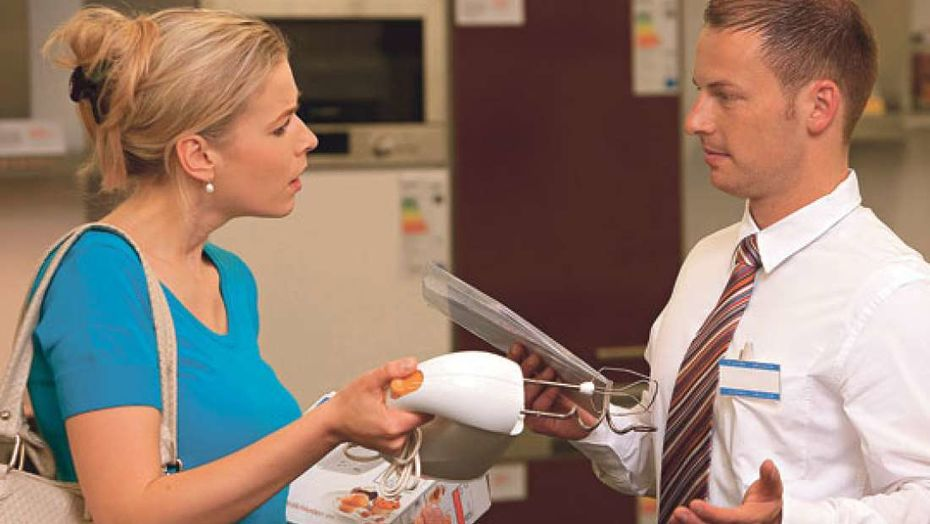


**Анализ тональности находит свое практическое применение в разных областях:**

– социология — собираем данные из соц. сетей (например, о религиозных взглядах)


– политология — собираем данные из блогов о политических взглядах населения


– маркетинг — анализируем Твиттер, чтобы узнать какая модель ноутбуков пользуется наибольшим спросом
 

– медицина и психология — определяем депрессию у пользователей соц. сетей

**Если мы не в R'n'D, то любая ML – это запрос бизнеса**

У Бизнеса свои проблемы и свои метрики достижения цели

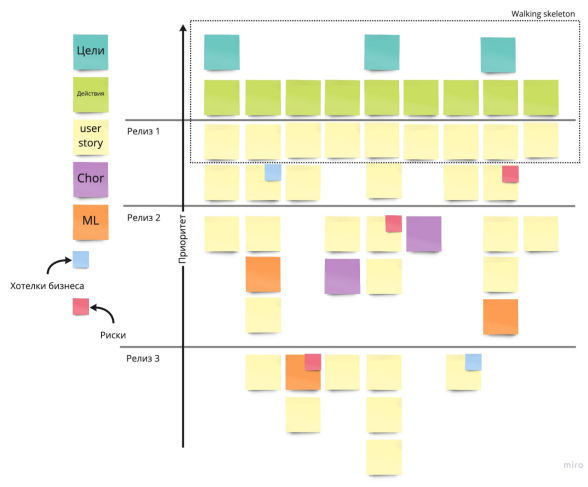

Проблема:
**"недовольные клиенты постят отзывы в интернете, операторы тратят слишком много времени поиск негативных сообщений"**

Звучит как то, что можно оптимизировать и где может пригодиться ML!

Чтобы проблему взять в работу, ее нужно сформулировать в виде гипотезы с измеримыми результатами. 

**Например:** мы полагаем, что снизим затраты на SMM-специалистов, работающих с социальными сетями. Для этого мы будем приоритезировать сообщения показывая негативные сообщения выше. Мы окажемся правы, если один специалист будет закрывать на 20% больше негатива 



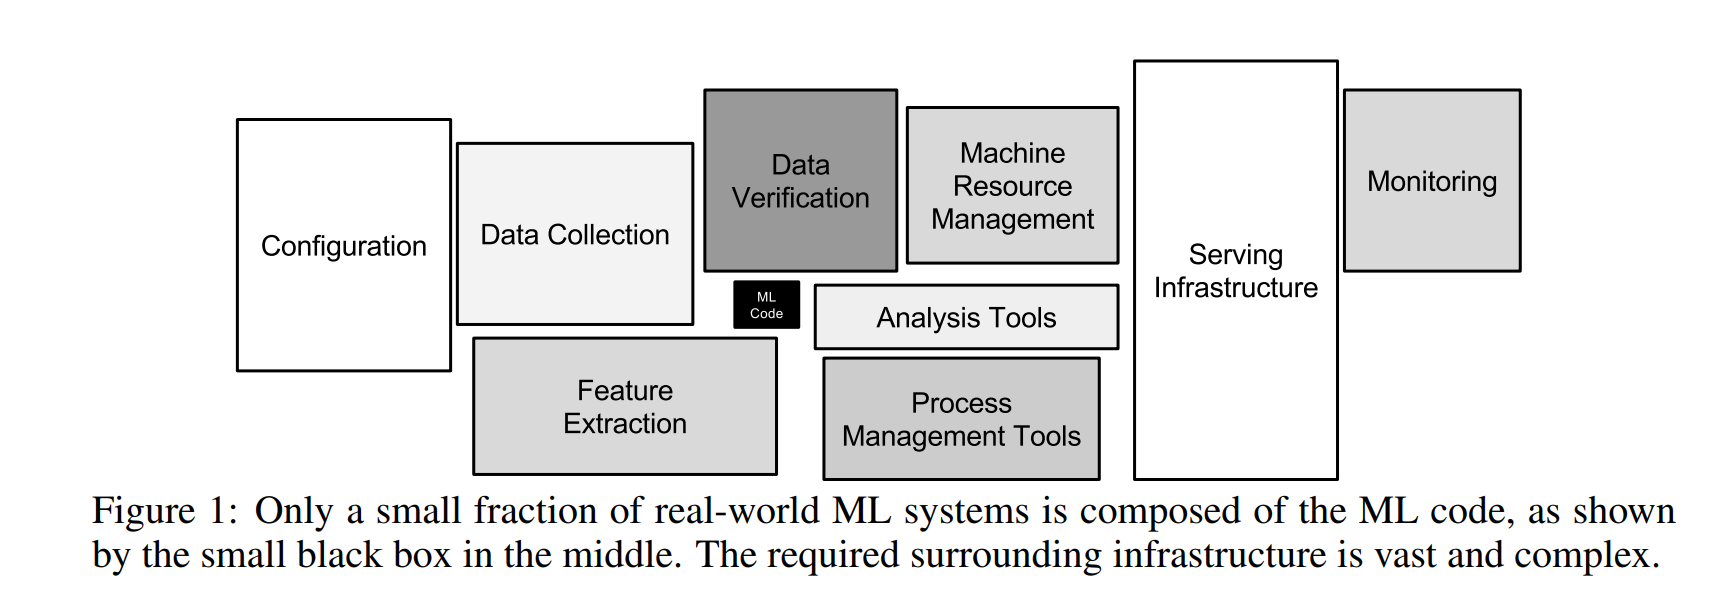

И еще одна картинка:
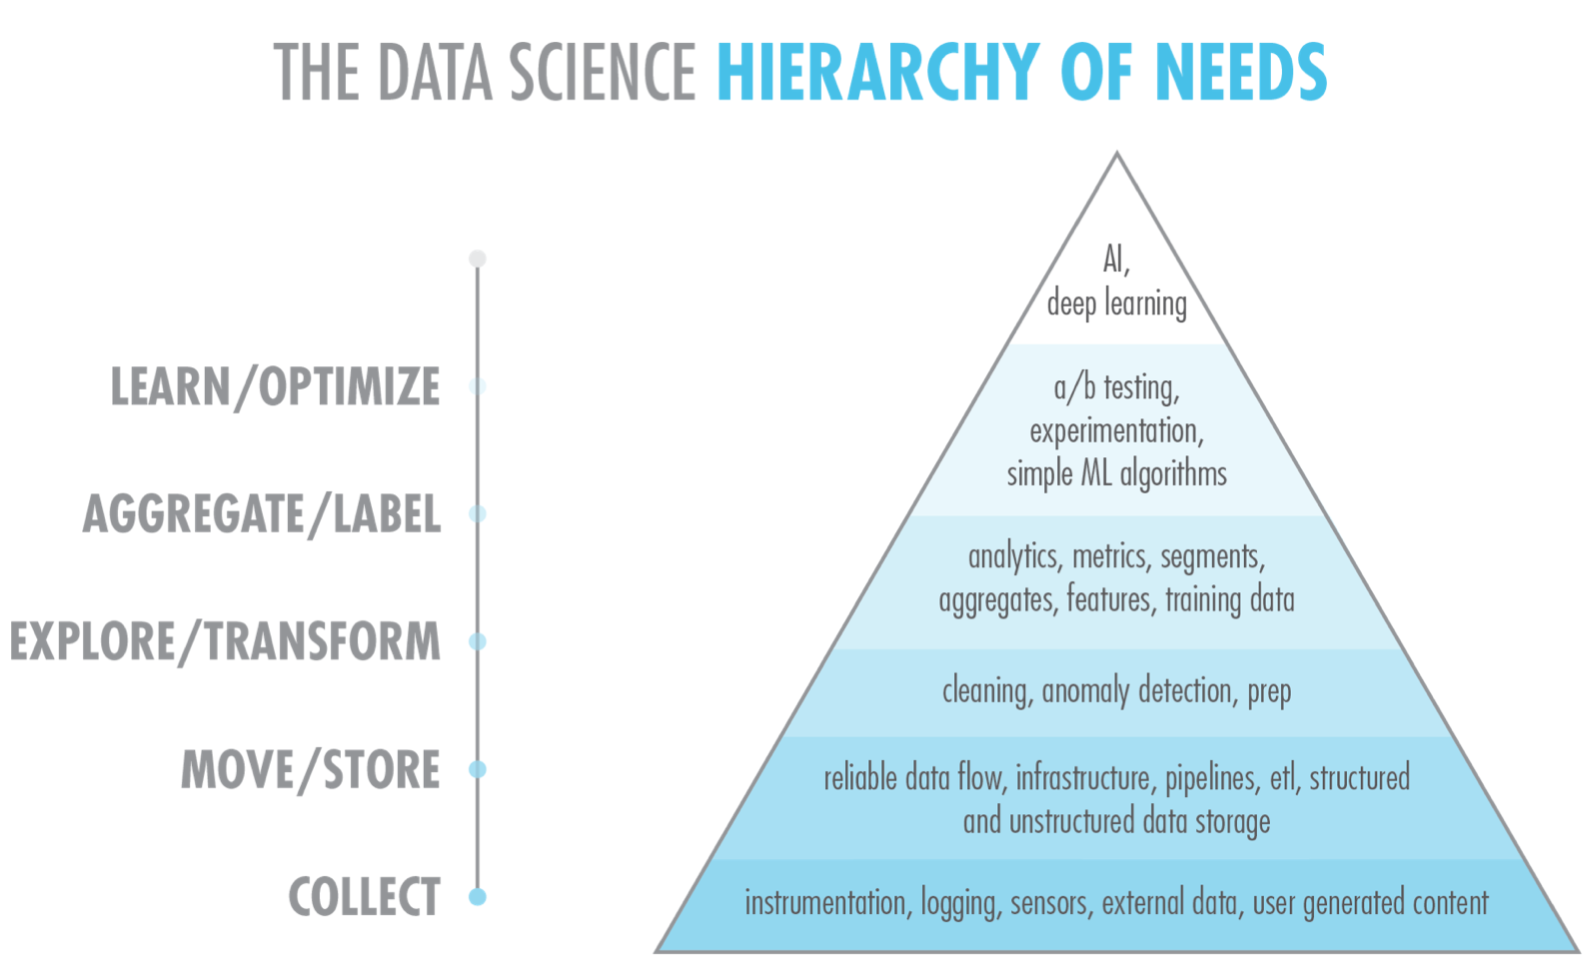

Работать будем в colab: https://colab.research.google.com/
 
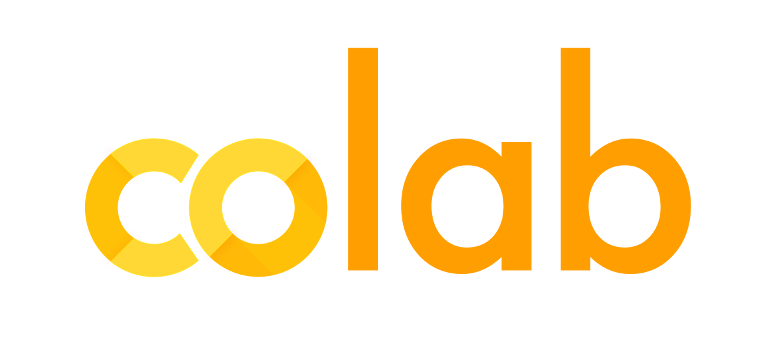

In [41]:
!pip install ipython-autotime

In [42]:
%load_ext autotime

time: 125 µs (started: 2020-12-24 18:06:39 +00:00)


# Загружаем данные




В качестве обучающего датасета возьмем коротких сообщений, собранных на базе русскоязычного Twitter: [study.mokoron.com](http://study.mokoron.com)

**Пояснение к полям базы данных**

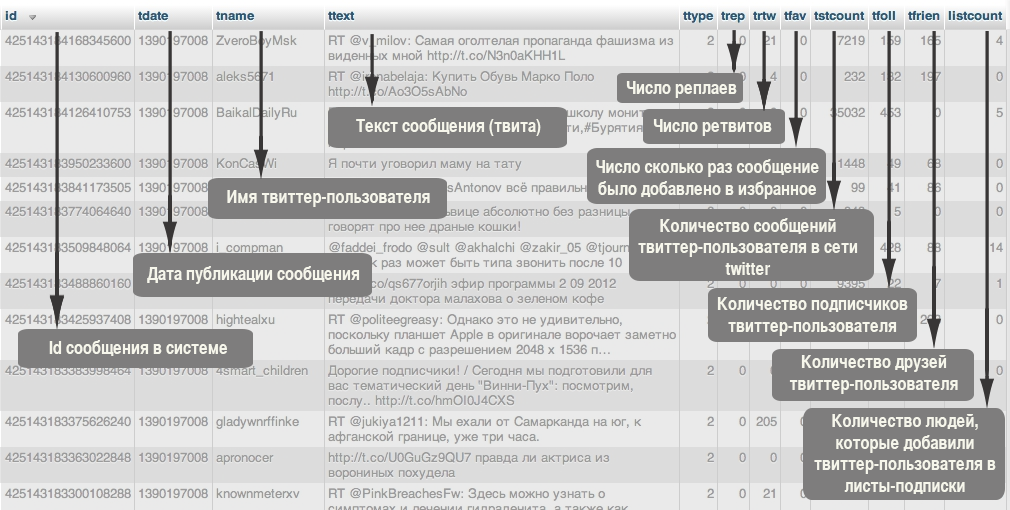

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Считаем файл

document = pd.read_csv('positive.csv', sep=';', error_bad_lines=False, encoding='utf-8', quoting=0)

#Выведем первые пять строк файла
print (document.head())

#Какие названия у столбцов (первая строка)?
print (document.columns)

   408906692374446080  1386325927  pleease_shut_up  ...  62  61  0.3
0  408906692693221377  1386325927  alinakirpicheva  ...  59  31    2
1  408906695083954177  1386325927        EvgeshaRe  ...  26  27    0
2  408906695356973056  1386325927    ikonnikova_21  ...  19  17    0
3  408906761416867842  1386325943        JumpyAlex  ...  16  23    1
4  408906761769598976  1386325943  JustinB94262583  ...   6  16    0

[5 rows x 12 columns]
Index(['408906692374446080', '1386325927', 'pleease_shut_up',
       '@first_timee хоть я и школота, но поверь, у нас то же самое :D общество профилирующий предмет типа)',
       '1', '0', '0.1', '0.2', '7569', '62', '61', '0.3'],
      dtype='object')


error_bad_lines=False – пропускаем строчки с ошибками,

encoding='utf-8' – кодировка файла,

quoting=3 – quoting : int, определяет, следует ли распознавать кавычки. Значения берутся из csv.QUOTE_* значений. Допустимыми значениями являются 0, 1, 2 и 3 для QUOTE_MINIMAL, QUOTE_ALL, QUOTE_NONE и QUOTE_NONNUMERIC соответственно.

In [3]:
# Добавим названия столбцов. Это потребуется в дальнейшем, чтобы обратиться к конкретному столбцу по названию

n = ['id', 'date', 'name', 'text', 'typr', 'rep', 'rtw', 'faw', 'stcount', 'foll', 'frien', 'listcount']
document = pd.read_csv('positive.csv', sep=';', error_bad_lines=False, names=n, encoding='utf-8', quoting=3)
print (document.head())

                     id          date               name  ...  foll frien listcount
0  "408906692374446080"  "1386325927"  "pleease_shut_up"  ...  "62"  "61"       "0"
1  "408906692693221377"  "1386325927"  "alinakirpicheva"  ...  "59"  "31"       "2"
2  "408906695083954177"  "1386325927"        "EvgeshaRe"  ...  "26"  "27"       "0"
3  "408906695356973056"  "1386325927"    "ikonnikova_21"  ...  "19"  "17"       "0"
4  "408906761416867842"  "1386325943"        "JumpyAlex"  ...   NaN   NaN       NaN

[5 rows x 12 columns]


In [4]:
print (document.columns)

Index(['id', 'date', 'name', 'text', 'typr', 'rep', 'rtw', 'faw', 'stcount',
       'foll', 'frien', 'listcount'],
      dtype='object')


In [5]:
# Посмотрим, сколько текстов в коллекции положительных твитов
print(document.shape)

(141061, 12)


In [6]:
# Посмотрим, есть ли пустые строки и какой тип у столбцов
print(document.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141061 entries, 0 to 141060
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         141046 non-null  object
 1   date       132086 non-null  object
 2   name       131960 non-null  object
 3   text       131961 non-null  object
 4   typr       115271 non-null  object
 5   rep        114919 non-null  object
 6   rtw        114915 non-null  object
 7   faw        114914 non-null  object
 8   stcount    114912 non-null  object
 9   foll       98467 non-null   object
 10  frien      97895 non-null   object
 11  listcount  97869 non-null   object
dtypes: object(12)
memory usage: 12.9+ MB
None


In [7]:
# Нам нужен только текст

data_positive = pd.read_csv('positive.csv', sep=';', error_bad_lines=False, names=n, usecols=['text'], encoding='utf-8', quoting=3)
data_negative = pd.read_csv('negative.csv', sep=';', error_bad_lines=False, names=n, usecols=['text'], encoding='utf-8', quoting=3)

print (data_positive.head(5))

                                                text
0  "@first_timee хоть я и школота, но поверь, у н...
1  "Да, все-таки он немного похож на него. Но мой...
2  "RT @KatiaCheh: Ну ты идиотка) я испугалась за...
3  "RT @digger2912: ""Кто то в углу сидит и погиб...
4       "@irina_dyshkant Вот что значит страшилка :D


In [8]:
# Считали классы коллекций, посмотрим что там
print(data_positive.info())
print(data_negative.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141061 entries, 0 to 141060
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    131961 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133825 entries, 0 to 133824
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    126685 non-null  object
dtypes: object(1)
memory usage: 1.0+ MB
None


In [9]:
# удалим нулевые элементы и повторы
data_positive = data_positive.dropna().drop_duplicates()
data_negative = data_negative.dropna().drop_duplicates()

print(data_positive.info())
print(data_negative.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110402 entries, 0 to 141060
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    110402 non-null  object
dtypes: object(1)
memory usage: 1.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 107076 entries, 0 to 133824
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    107076 non-null  object
dtypes: object(1)
memory usage: 1.6+ MB
None


In [10]:
print ("Число положительных текстов:", data_positive.size, "\nЧисло отрицательных текстов:", data_negative.size)

Число положительных текстов: 110402 
Число отрицательных текстов: 107076


In [11]:
sample_size = min(data_positive.shape[0], data_negative.shape[0]) #уравниваем количество положительных и отрицательных тектов
raw_data = np.concatenate((data_positive['text'].values[:sample_size],
                           data_negative['text'].values[:sample_size]), axis=0)
labels = [1] * sample_size + [0] * sample_size




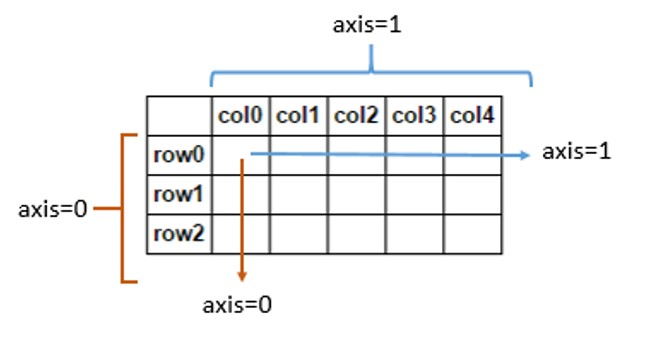

In [12]:
# Загрузили данные, посмотрим, что там:
print (raw_data[103684], "  Класс тональности: ", labels[103684])
print (raw_data[126687], "  Класс тональности: ", labels[126687])

"RT @blackmoor5: @ShelestAlya Ко мне возвращаются все хорошие дела :DDD   Класс тональности:  1
"RT @newalbumazaza: отель не хочет меня с вами знакомить. говорит, что я пока стремный...(((((((((    Класс тональности:  0


In [13]:
# Сколько положительных и отрицательных текстов в подготовленной коллеции?

print ("Число положительных текстов:", labels.count(1),"\nЧисло отрицательных текстов:", labels.count(0))

Число положительных текстов: 107076 
Число отрицательных текстов: 107076


# Создаем датасет 

In [14]:
# создаем датасет с которым будем работать
import re

def preprocess_text(text):
  text = text.lower().replace("ё", "е")  
  text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', text)
  text = re.sub('@[^\s]+', 'USER', text)
  text = re.sub('[^a-zA-Zа-яА-Я1-9]+', ' ', text)
  text = re.sub(' +', ' ', text) 
  return text.strip()  #убираем спецсимволы и удаляем лишние пробелы

data = [preprocess_text(str(t)) for t in raw_data]

In [15]:
# сравниваем исходный текст и предобработанный
print (raw_data[23] +'\n'+ data[23])

"@StalinGulag унылый?...наверное...вдруг его перед этим чпокнули?))))"
USER унылый наверное вдруг его перед этим чпокнули


In [17]:
# датасет надо разделить на обучающий и тестовый
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=2)

test_size используется для разбиения выборки (в нашем случае будет 20% использовано на тесты).

random_state – Суть параметра в воспроизводимости случайных значениий.




In [55]:
##### ищем именно эти, новогодние тексты ########
print (x_train.index('до сих пор не новогоднего настроения'))
print (x_train.index('USER как отправить еще ящик мандаринов'))


42289
137401


In [18]:
print (x_train[42289], y_train[42289])
print (x_train[137401], y_train[137401])
print (x_test[42289], y_test[42289])

до сих пор не новогоднего настроения 0
USER как отправить еще ящик мандаринов 1
если быстро произнести рекордно сложную скороговорку pad kid poured curd pulled cod можно потерять дар речи 1


In [19]:
print (len(y_train), len(y_test))

171321 42831


# Векторизация текста

**Модель мешка слов**

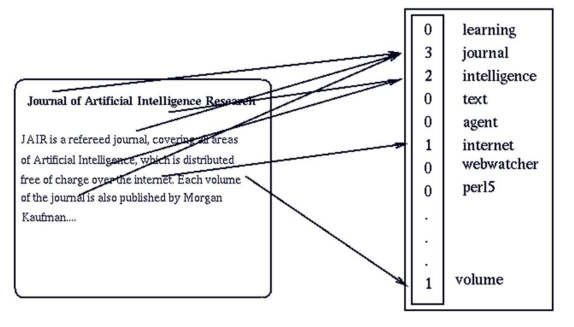

Недостаток модели мешка слов заключается в том, что некоторые слова типа USER или "и" часто встречаются, и их большие значения будут иметь больше вес в закодированных векторах.



**Модель с взвешиванием TF-IDF**

[Документация по TF-IDF](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)


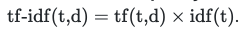

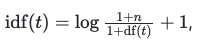

[Справочные материалы по извлечению признаков](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction)

**"Домашнее задание"**

Сделать векторизацию текстов на биграммах (поиск bigram_vectorizer)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# обучаем векторайзер
tfidf = TfidfVectorizer(decode_error='ignore')

X = tfidf.fit_transform([str(x) for x in data])
print(X.shape)


(214152, 168779)


214152 текстов (107076 положительных и 107076 отрицательных)
и 168779 уникальных словоформ – координат вектора

In [21]:
# покажем как выглядит данные после векторизации
X

<214152x168779 sparse matrix of type '<class 'numpy.float64'>'
	with 2019254 stored elements in Compressed Sparse Row format>

In [24]:
print (data[27905])
print (X[27905])

print (data[34920])
print (X[34920])

print (data[512])
print (X[512])

print ("8985 – координата термина USER")

USER как отправить еще ящик мандаринов
  (0, 96611)	0.505471152232713
  (0, 73890)	0.5715904159119344
  (0, 168749)	0.5579051978742089
  (0, 59270)	0.19865957121295175
  (0, 46202)	0.2393844306943106
  (0, 8985)	0.09876522662223824
колись сяду перчитаю все все шо тут написано
  (0, 101909)	0.5185102475803358
  (0, 142945)	0.4069039817012478
  (0, 63464)	0.4613772088387149
  (0, 82260)	0.3455319045908626
  (0, 164657)	0.3208624068887426
  (0, 148769)	0.2175263373977329
  (0, 29355)	0.2881746957797438
мммммм у столицы на онего новое любимое словосочетание власти петрозаводска и власти карелии
  (0, 60234)	0.3119849691370339
  (0, 102089)	0.335319334715412
  (0, 26908)	0.4940839746010732
  (0, 134140)	0.3464857397120548
  (0, 87871)	0.22563426329440917
  (0, 93144)	0.3464857397120548
  (0, 140269)	0.2971411438642833
  (0, 77422)	0.30830754886092626
  (0, 72325)	0.2552139078766337
  (0, 80222)	0.08130959098213979
8985 – координата термина USER


Особенности работы с текстами – сильно разреженные данные. 
Разрежённая матрица — это матрица с преимущественно нулевыми элементами.

# Меры качества

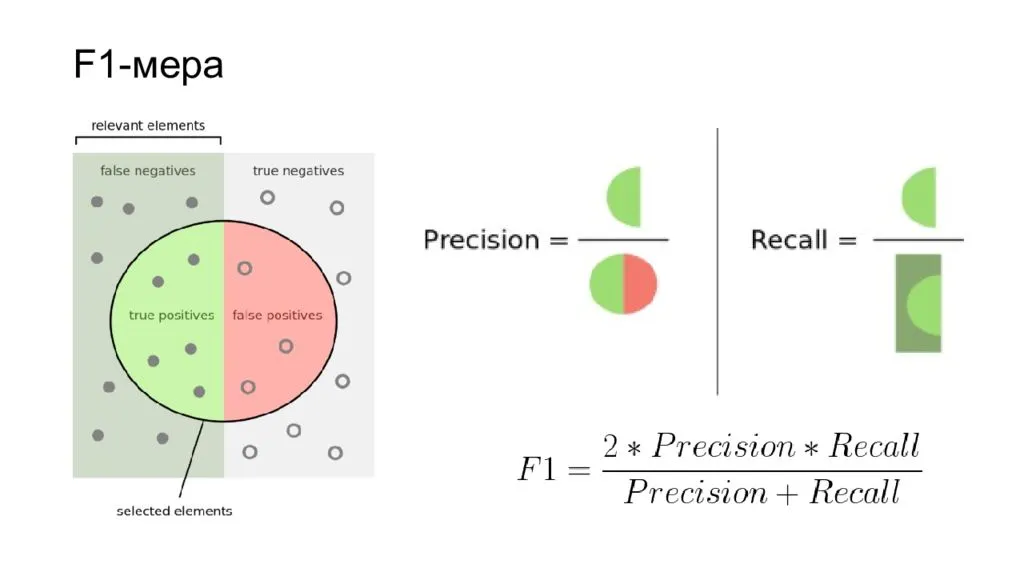

Наша гипотеза: мы полагаем, что снизим затраты на SMM-специалистов, работающих с социальными сетями. Для этого мы будем приоритезировать сообщения показывая негативные сообщения выше. Мы окажемся правы, если один специалист будет закрывать на 20% больше негатива 

Как она бьется с F-мерой?

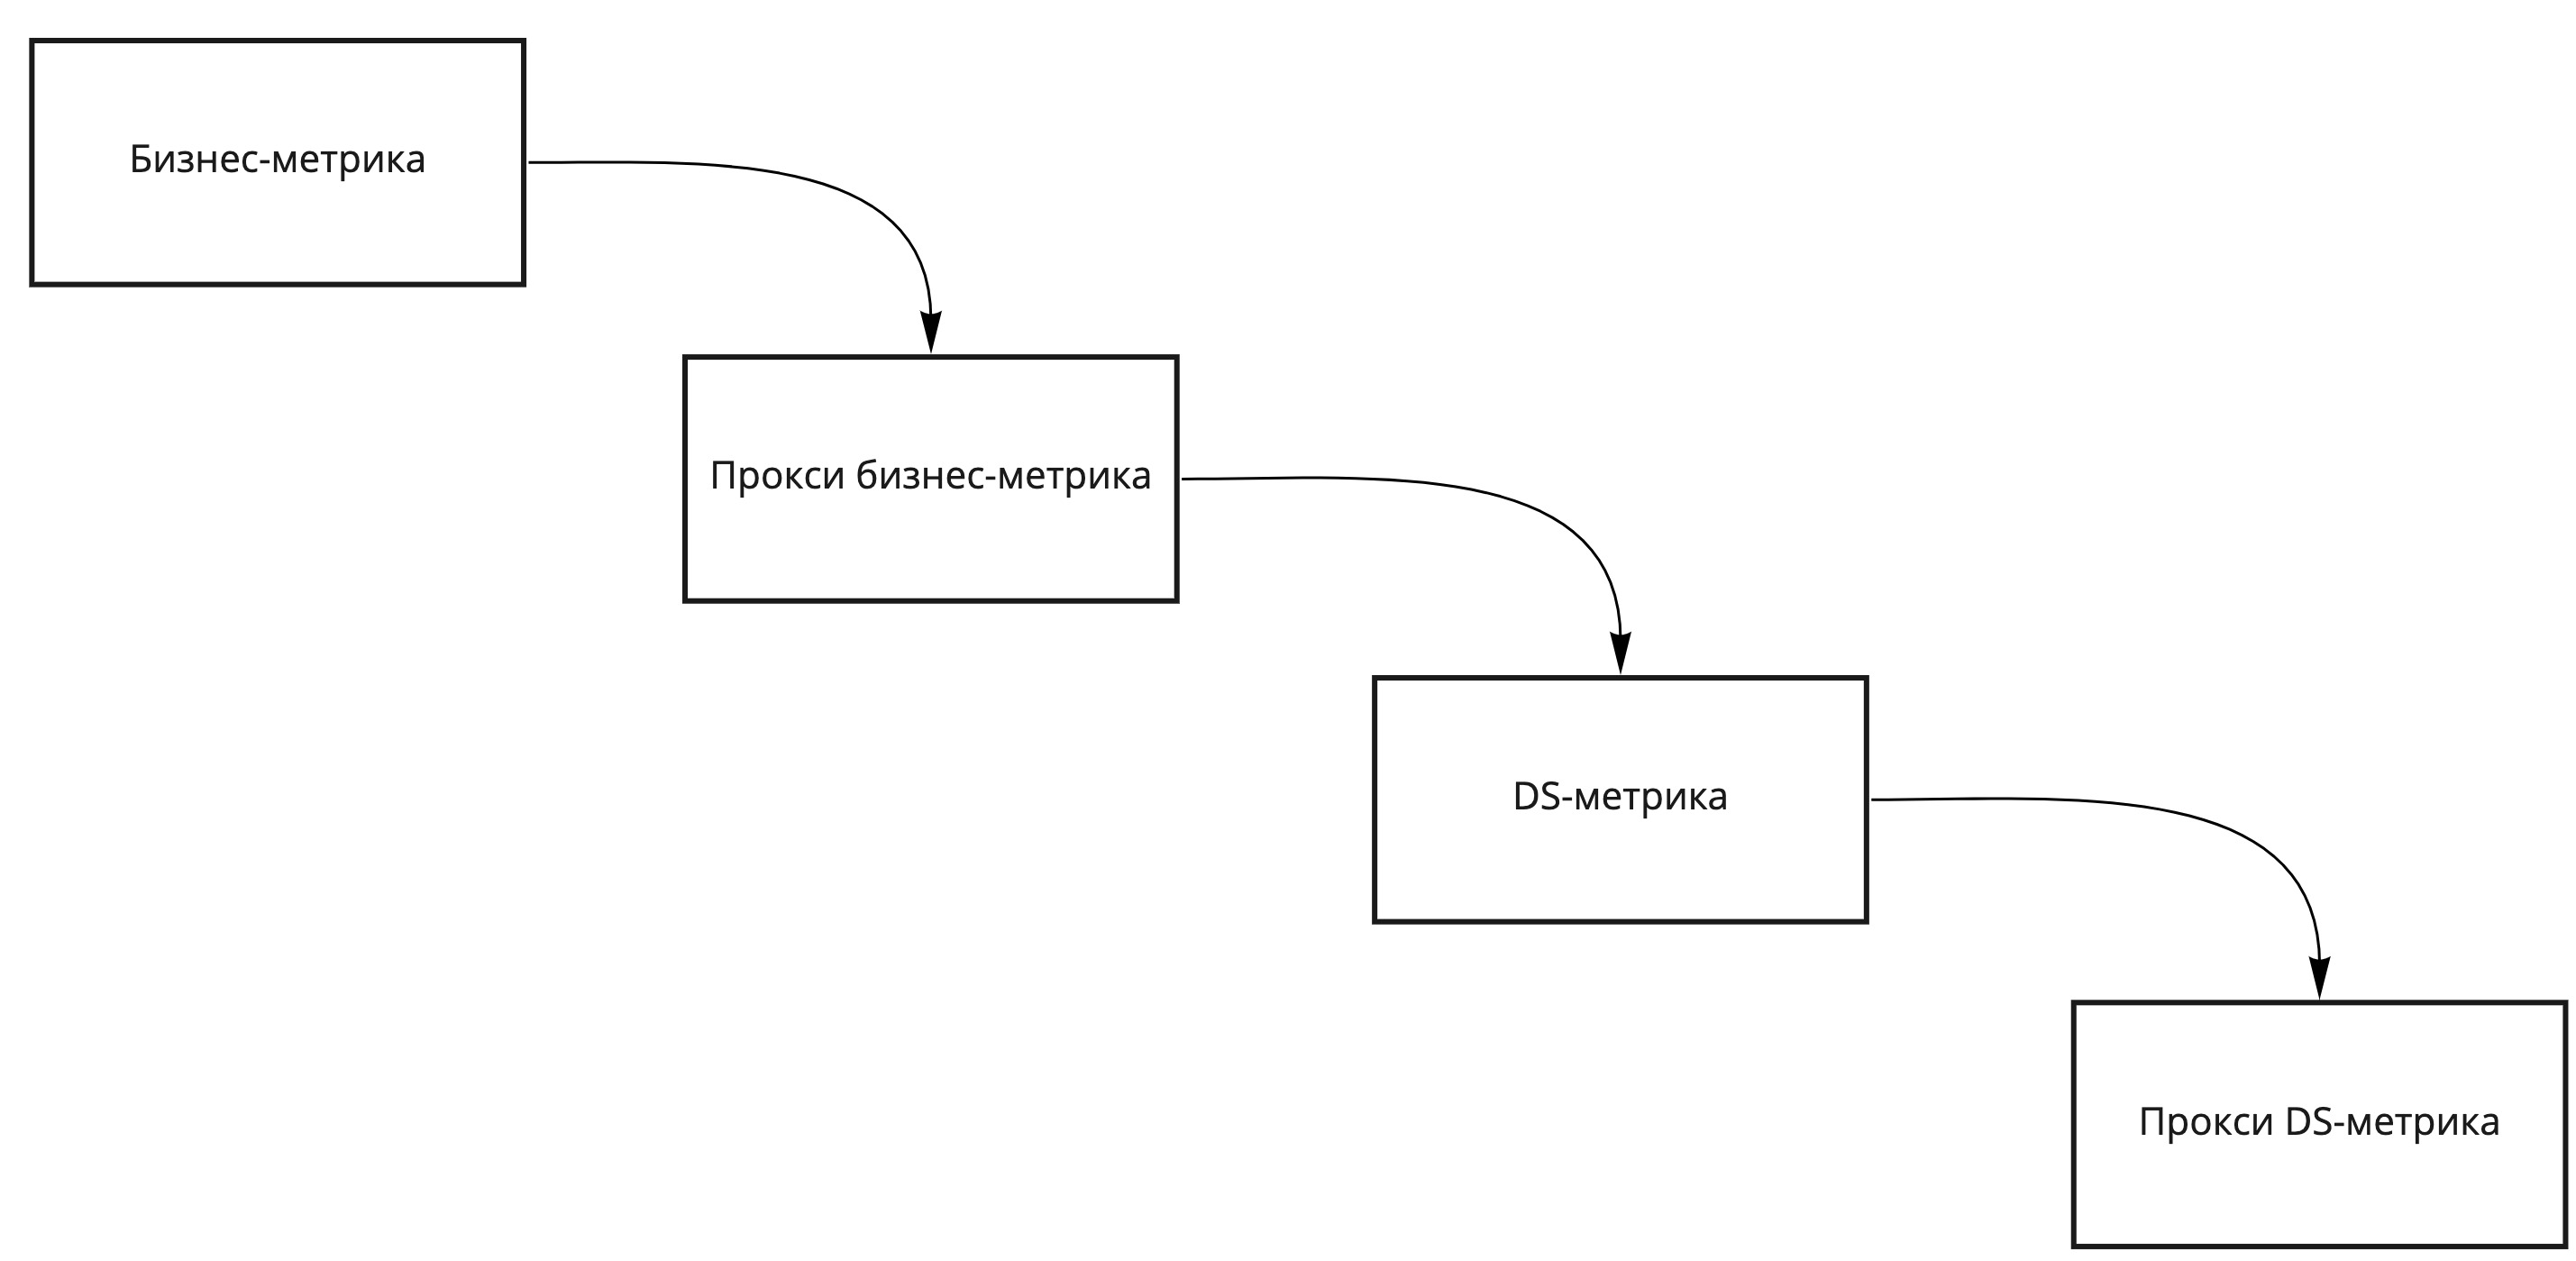

# Классификация

In [25]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


classifiers = [LogisticRegression(), LinearSVC(), KNeighborsClassifier(), DecisionTreeClassifier()]

[Логистичекая регрессия](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)


[SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)



[K-ближайших соседей](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html?highlight=kneighborsclassifier#sklearn.neighbors.KNeighborsClassifier)



[Дерево принятия решений](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier)





In [62]:
# классифицируем и выводим результаты

for classifier in classifiers:
  print(classifier)
  classifier.fit(tfidf.transform(x_train), y_train)
  y_pred = classifier.predict(tfidf.transform(x_test))
  print(classification_report(y_test, y_pred, digits=6))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0   0.744871  0.703905  0.723809     21510
           1   0.716984  0.756766  0.736338     21321

    accuracy                       0.730219     42831
   macro avg   0.730928  0.730335  0.730073     42831
weighted avg   0.730989  0.730219  0.730046     42831

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
              precision    recall  f1-score   support

           0   0.721664  0.717806  0.719730     21510
           1   0.716831  0.720698  0.718760     21321

    accuracy                       0.719245     42831
   macro avg   0.719248  0.719252  0.719245     42831
weighted avg   0.719258  0.719245  0.719247     42831

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_

# Стоп слова

In [26]:
N = 10
X = tfidf.fit_transform(data)
# индексы топ 10 столбцов с максимальной суммой элементов (в столбцах)
idx = np.ravel(X.sum(axis=0).argsort(axis=1))[::-1][:N]   #ravel() возвращает сжатый до одной оси массив
top_10_words = np.array(tfidf.get_feature_names())[idx].tolist()
print (top_10_words)

['user', 'не', 'rt', 'url', 'что', 'на', 'как', 'меня', 'все', 'так']


In [27]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
from nltk.corpus import stopwords as nltk_stopwords
stopWords = nltk_stopwords.words("russian")
print(stopWords)

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [29]:
stopWords.append("бакаряка")
stopWords.remove("нельзя")
print(stopWords)

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [30]:
tfidf_sw = TfidfVectorizer(stop_words=stopWords, decode_error='ignore')

X_sw = tfidf_sw.fit_transform(data)
idx_sw = np.ravel(X_sw.sum(axis=0).argsort(axis=1))[::-1][:N]
top_10_words_sw = np.array(tfidf.get_feature_names())[idx_sw].tolist()
print (top_10_words_sw)

['user', 'rt', 'url', 'эслолмадим', 'сдулось', 'хотенка', 'оценил', 'дениска', 'проспи', 'творите']


# Классификация со стоп-словами

In [68]:
for classifier in classifiers:
  print(classifier)
  classifier.fit(tfidf_sw.transform(x_train), y_train)
  y_pred = classifier.predict(tfidf_sw.transform(x_test))
  print(classification_report(y_test, y_pred, digits=6))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0   0.733891  0.689400  0.710950     21510
           1   0.704707  0.747807  0.725618     21321

    accuracy                       0.718475     42831
   macro avg   0.719299  0.718604  0.718284     42831
weighted avg   0.719363  0.718475  0.718252     42831

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
              precision    recall  f1-score   support

           0   0.707661  0.705951  0.706805     21510
           1   0.704066  0.705783  0.704923     21321

    accuracy                       0.705867     42831
   macro avg   0.705864  0.705867  0.705864     42831
weighted avg   0.705872  0.705867  0.705868     42831

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_

# Код для самостоятельной работы

In [31]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer


n = ['id', 'date', 'name', 'text', 'typr', 'rep', 'rtw', 'faw', 'stcount', 'foll', 'frien', 'listcount']
data_positive = pd.read_csv('positive.csv', sep=';', error_bad_lines=False, names=n, usecols=['text'], encoding='utf-8', quoting=3)
data_negative = pd.read_csv('negative.csv', sep=';', error_bad_lines=False, names=n, usecols=['text'], encoding='utf-8', quoting=3)

# удалим нулевые элементы и дубликаты
data_positive = data_positive.dropna().drop_duplicates()
data_negative = data_negative.dropna().drop_duplicates()

sample_size = min(data_positive.shape[0], data_negative.shape[0]) #уравниваем количество положительных и отрицательных тектов
raw_data = np.concatenate((data_positive['text'].values[:sample_size],
                           data_negative['text'].values[:sample_size]), axis=0)
labels = [1] * sample_size + [0] * sample_size

# создаем датасет с которым будем работать

def preprocess_text(text):
  text = text.lower().replace("ё", "е")  
  text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', text)
  text = re.sub('@[^\s]+', 'USER', text)
  text = re.sub('[^a-zA-Zа-яА-Я1-9]+', ' ', text)
  text = re.sub(' +', ' ', text) 
  return text.strip()  #убираем спецсимволы и удаляем лишние пробелы

self_data = [preprocess_text(str(t)) for t in raw_data]

# датасет надо разделить на обучающий и тестовый

self_x_train, self_x_test, self_y_train, self_y_test = train_test_split(self_data, labels, test_size=0.2, random_state=2)


## Стоп-слова

In [32]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
from nltk.corpus import stopwords as nltk_stopwords
self_stopWords = nltk_stopwords.words("russian")
print(self_stopWords)

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [35]:
# пишем слова, которые хотим добавить или удалить
# слова добавляем в кавычках, через запятую

delete = ["нельзя", "не", "ни", "нет"]
#add = ["бакаряка", "чупакабра", "ну", "как"]

#[self_stopWords.append(word) for word in add if word not in self_stopWords]
[self_stopWords.remove(word) for word in delete if word in self_stopWords]

print(self_stopWords)


['и', 'в', 'во', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впрочем', 'хорошо', 'с

In [36]:
# запишем стоп-слова в файл
with open('stop-list.txt', 'w') as f:
    for item in self_stopWords:
      f.write("%s\n" % item)
f.close()

## Классификация

In [37]:
# векторизация текста

self_tfidf = TfidfVectorizer(stop_words=self_stopWords, decode_error='ignore')
self_X = self_tfidf.fit_transform(self_data)

In [38]:
classifier = LinearSVC()
classifier.fit(self_tfidf.transform(self_x_train), self_y_train)
self_y_pred = classifier.predict(self_tfidf.transform(self_x_test))
print(classification_report(self_y_test, self_y_pred, digits=6))


              precision    recall  f1-score   support

           0   0.714794  0.710507  0.712644     21510
           1   0.709697  0.713991  0.711837     21321

    accuracy                       0.712241     42831
   macro avg   0.712245  0.712249  0.712241     42831
weighted avg   0.712256  0.712241  0.712242     42831



# Проверка кода победителей

In [39]:
with open('stop-list.txt', "r") as f:
    winner_stopWords = list(f)
    winner_stopWords = [line.rstrip() for line in winner_stopWords]
f.close()
print(winner_stopWords)

['ну']


In [40]:
win_tfidf = TfidfVectorizer(stop_words=winner_stopWords, decode_error='ignore')
win_X = win_tfidf.fit_transform(self_data)

In [41]:
win_x_train, win_x_test, win_y_train, win_y_test = train_test_split(data, labels, test_size=0.2, random_state=2)

In [42]:
classifier = LinearSVC()
classifier.fit(win_tfidf.transform(win_x_train), win_y_train)
win_y_pred = classifier.predict(win_tfidf.transform(win_x_test))
print(classification_report(win_y_test, win_y_pred, digits=6))

              precision    recall  f1-score   support

           0   0.721674  0.717480  0.719571     21510
           1   0.716637  0.720839  0.718732     21321

    accuracy                       0.719152     42831
   macro avg   0.719156  0.719159  0.719151     42831
weighted avg   0.719167  0.719152  0.719153     42831



# Пояснения

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?',
     'cat and dog'
 ]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print (X)
print(vectorizer.get_feature_names())
#['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
print(X.shape)
#(4, 9)

  (0, 2)	0.4675611193093788
  (0, 4)	0.5632653463476817
  (0, 8)	0.39332715361557363
  (0, 5)	0.39332715361557363
  (0, 10)	0.39332715361557363
  (1, 7)	0.5166558607403112
  (1, 2)	0.6920209026612973
  (1, 8)	0.29107489977812206
  (1, 5)	0.29107489977812206
  (1, 10)	0.29107489977812206
  (2, 6)	0.5268183456779909
  (2, 9)	0.5268183456779909
  (2, 0)	0.42503372417496094
  (2, 8)	0.2968002665251347
  (2, 5)	0.2968002665251347
  (2, 10)	0.2968002665251347
  (3, 2)	0.4675611193093788
  (3, 4)	0.5632653463476817
  (3, 8)	0.39332715361557363
  (3, 5)	0.39332715361557363
  (3, 10)	0.39332715361557363
  (4, 3)	0.6141889663426562
  (4, 1)	0.6141889663426562
  (4, 0)	0.49552379079705033
['and', 'cat', 'document', 'dog', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
(5, 11)


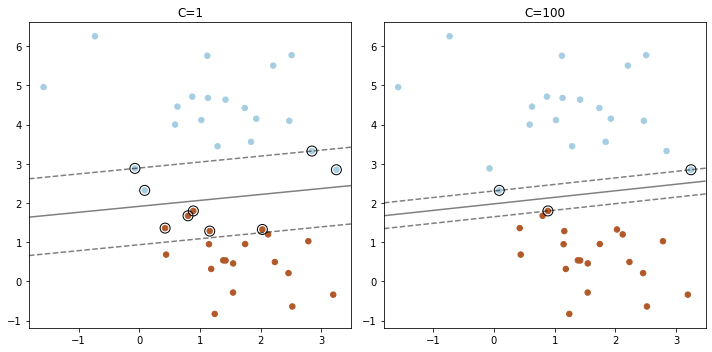

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC

X, y = make_blobs(n_samples=40, centers=2, random_state=0)

plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 100]):
    # "hinge" is the standard SVM loss
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(X, y)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    support_vector_indices = np.where((2 * y - 1) * decision_function <= 1)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()

# Лемматизация

In [2]:
!pip install -U pymorphy2-dicts-ru

Requirement already up-to-date: pymorphy2-dicts-ru in /usr/local/lib/python3.6/dist-packages (2.4.417127.4579844)


In [3]:
!pip install pymorphy2

In [4]:
import pymorphy2
from nltk.tokenize import word_tokenize

In [12]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
morph = pymorphy2.MorphAnalyzer()

In [14]:
def lemmatize(text):
    tokens = []
    text_tokens = word_tokenize(text)
    for token in text_tokens:
      token = morph.parse(token)[0].normal_form
      tokens.append(token)
    line = ' '.join(str(e) for e in tokens)
    return line


In [43]:
# проверим на обычном тексте
lemmatize("В 5 классе будет учиться, на радость англичанке нашей))")

'в 5 класс быть учиться , на радость англичанка наш ) )'

time: 11.4 ms (started: 2020-12-24 18:07:01 +00:00)


In [44]:
# применяем лемматизацию к нашему датасету
lemma_data = [lemmatize(str(t)) for t in data]


time: 8min 33s (started: 2020-12-24 18:07:02 +00:00)


In [45]:
x_lemma_train, x_lemma_test, y_lemma_train, y_lemma_test = train_test_split(lemma_data, labels, test_size=0.2, random_state=2)


time: 157 ms (started: 2020-12-24 18:15:35 +00:00)


In [46]:
# обучаем векторайзер без стоп-слов
tfidf_lemma = TfidfVectorizer(decode_error='ignore')
lemma_X = tfidf_lemma.fit_transform(lemma_data)

time: 2.95 s (started: 2020-12-24 18:15:36 +00:00)


In [49]:
lemma_X


<214152x98562 sparse matrix of type '<class 'numpy.float64'>'
	with 1962613 stored elements in Compressed Sparse Row format>

time: 4.62 ms (started: 2020-12-24 18:16:46 +00:00)


**В случае словоформ у нас было:** 214152 текстов (107076 положительных и 107076 отрицательных) и 168779 уникальных словоформ – координат вектора.

С леммами у нас: все также 214152 текстов, но координат вектора стало: 98562 (на 8 514 меньше)


In [55]:
for classifier in classifiers:
  print(classifier)
  classifier.fit(tfidf_lemma.transform(x_lemma_train), y_lemma_train)
  y_lemma_pred = classifier.predict(tfidf_lemma.transform(x_lemma_test))
  print(classification_report(y_lemma_test, y_lemma_pred, digits=6))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0   0.737301  0.707206  0.721940     21510
           1   0.716294  0.745791  0.730744     21321

    accuracy                       0.726413     42831
   macro avg   0.726797  0.726498  0.726342     42831
weighted avg   0.726844  0.726413  0.726323     42831

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
              precision    recall  f1-score   support

           0   0.717415  0.715714  0.716563     21510
           1   0.713878  0.715586  0.714731     21321

    accuracy                       0.715650     42831
   macro avg   0.715646  0.715650  0.715647     42831
weighted avg   0.715654  0.715650  0.715651     42831

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_